# 处理缺失值、异常值并对数据进行归一化。


### 读取文件

In [1]:
import pandas as pd
import warnings
import matplotlib as plt
warnings.filterwarnings("ignore")
plt.rcParams["font.sans-serif"] = ["SimHei"]
plt.rcParams["axes.unicode_minus"] = False #解决中文乱码等问题

# 使用 pandas 读取 CSV 文件
file_path = r"C:\Users\Lenovo\OneDrive\ooooooooo\文档\竞赛及项目\weather_data_preprocessing\GlobalWeatherRepository.csv"  # 请替换为你的文件路径
data = pd.read_csv(file_path, encoding='utf-8')

# 显示前几行数据
data.head()

,国家,城市,纬度,经度,时区,上次更新的时间戳,上次数据更新的当地时间,摄氏度,华氏度,天气状况描述,...,PM2.5,PM10,美国环保署指数,GBDEFRA指数,日出时间,日落时间,月出时间,月落时间,月相,月亮照明百分比
0,Afghanistan,Kabul,34.52,69.18,Asia/Kabul,1715849100,2024/5/16 13:15,26.6,79.8,Partly Cloudy,...,8.4,26.6,1,1,4:50 AM,6:50 PM,12:12 PM,1:11 AM,Waxing Gibbous,55
1,Albania,Tirana,41.33,19.82,Europe/Tirane,1715849100,2024/5/16 10:45,19.0,66.2,Partly cloudy,...,1.1,2.0,1,1,5:21 AM,7:54 PM,12:58 PM,2:14 AM,Waxing Gibbous,55
2,Algeria,Algiers,36.76,3.05,Africa/Algiers,1715849100,2024/5/16 9:45,23.0,73.4,Sunny,...,10.4,18.4,1,1,5:40 AM,7:50 PM,1:15 PM,2:14 AM,Waxing Gibbous,55
3,Andorra,Andorra La Vella,42.50,1.52,Europe/Andorra,1715849100,2024/5/16 10:45,6.3,43.3,Light drizzle,...,0.7,0.9,1,1,6:31 AM,9:11 PM,2:12 PM,3:31 AM,Waxing Gibbous,55
4,Angola,Luanda,-8.84,13.23,Africa/Luanda,1715849100,2024/5/16 9:45,26.0,78.8,Partly cloudy,...,183.4,262.3,5,10,6:12 AM,5:55 PM,1:17 PM,12:38 AM,Waxing Gibbous,55


### 处理缺失值/异常值

In [2]:
# 检查数据中的缺失值
missing_data = data.isnull()

# 显示每列缺失值的数量
missing_count = missing_data.sum()

# 显示每列缺失值的百分比
missing_percentage = (missing_data.sum() / len(data)) * 100

# 输出缺失值数量和百分比
print("每列的缺失值数量:")
missing_count
# print("\n每列的缺失值百分比:")
# print(missing_percentage)

每列的缺失值数量:


国家             0
城市             0
纬度             0
经度             0
时区             0
上次更新的时间戳       0
上次数据更新的当地时间    0
摄氏度            0
华氏度            0
天气状况描述         0
风速（英里/h）       0
风速（公里/h）       0
风向（度）          0
风向             0
压力（mb）         0
压力（in）         0
降水量（mm）        0
降水量（in）        0
湿度%            0
云量%            0
体感温度（摄氏度）      0
体感温度（华氏度）      0
可见度（km）        0
可见度（miles）     0
紫外线指数          0
风速（mph）        0
风速（kph）        0
一氧化碳           0
臭氧             0
二氧化氮           0
二氧化硫           0
PM2.5          0
PM10           0
美国环保署指数        0
GBDEFRA指数      0
日出时间           0
日落时间           0
月出时间           0
月落时间           0
月相             0
月亮照明百分比        0
dtype: int64

In [3]:
import numpy as np
# 定义转换函数
def convert_to_24hr(time_str):
    try:
        # 尝试将12小时制的时间转换为24小时制
        return pd.to_datetime(time_str, format='%I:%M %p').strftime('%H:%M')
    except ValueError:
        # 如果格式不对，返回 NaN
        return np.nan

# 应用转换函数到月落时间列
data['月出时间'] = data['月出时间'].apply(convert_to_24hr)
data['月落时间'] = data['月落时间'].apply(convert_to_24hr)
data['日出时间'] = data['日出时间'].apply(convert_to_24hr)
data['日落时间'] = data['日落时间'].apply(convert_to_24hr)


In [4]:
# 定义转换函数，将时间字符串转换为分钟数
def time_to_minutes(time_str):
    # 确保仅处理有效的字符串类型时间
    if isinstance(time_str, str):
        try:
            # 将 'XX:XX' 格式的时间字符串分割为小时和分钟，并转换为总分钟数
            hours, minutes = map(int, time_str.split(':'))
            return hours * 60 + minutes
        except ValueError:
            # 如果格式不正确，返回 NaN
            return np.nan
    else:
        # 如果不是字符串（如 NaN），返回 NaN
        return np.nan

# 将月落时间转换为分钟数
data['月落时间'] = data['月落时间'].apply(time_to_minutes)
data['月出时间'] = data['月出时间'].apply(time_to_minutes)
data['日出时间'] = data['日出时间'].apply(time_to_minutes)
data['日落时间'] = data['日落时间'].apply(time_to_minutes)

# 删除无效的 NaN 值
valid_minutes1 = data['月出时间'].dropna()
valid_minutes2 = data['月落时间'].dropna()
valid_minutes3 = data['日出时间'].dropna()
valid_minutes4 = data['日落时间'].dropna()

# 计算有效时间的平均分钟数
average_minutes1 = valid_minutes1.mean()
average_minutes2 = valid_minutes2.mean()
average_minutes3 = valid_minutes3.mean()
average_minutes4 = valid_minutes4.mean()

# 用平均分钟数填充 NaN 值
data['月出时间'].fillna(average_minutes1, inplace=True)
data['月落时间'].fillna(average_minutes2, inplace=True)
data['日出时间'].fillna(average_minutes3, inplace=True)
data['日落时间'].fillna(average_minutes4, inplace=True)

# # 定义函数，将分钟数转换为小时:分钟的格式
# def minutes_to_time(minutes):
#     hours = int(minutes // 60)  # 计算小时
#     minutes = int(minutes % 60)  # 计算分钟
#     return f"{hours:02}:{minutes:02}"  # 格式化为 XX:XX

# # 将分钟数转换回小时:分钟格式
# data['月出时间'] = data['月出时间'].apply(minutes_to_time)
# data['月落时间'] = data['月落时间'].apply(minutes_to_time)
# data['日出时间'] = data['日出时间'].apply(minutes_to_time)
# data['日落时间'] = data['日落时间'].apply(minutes_to_time)
data

,国家,城市,纬度,经度,时区,上次更新的时间戳,上次数据更新的当地时间,摄氏度,华氏度,天气状况描述,...,PM2.5,PM10,美国环保署指数,GBDEFRA指数,日出时间,日落时间,月出时间,月落时间,月相,月亮照明百分比
0,Afghanistan,Kabul,34.5200,69.1800,Asia/Kabul,1715849100,2024/5/16 13:15,26.6,79.8,Partly Cloudy,...,8.400,26.60,1,1,290,1130,732.000000,71.0,Waxing Gibbous,55
1,Albania,Tirana,41.3300,19.8200,Europe/Tirane,1715849100,2024/5/16 10:45,19.0,66.2,Partly cloudy,...,1.100,2.00,1,1,321,1194,778.000000,134.0,Waxing Gibbous,55
2,Algeria,Algiers,36.7600,3.0500,Africa/Algiers,1715849100,2024/5/16 9:45,23.0,73.4,Sunny,...,10.400,18.40,1,1,340,1190,795.000000,134.0,Waxing Gibbous,55
3,Andorra,Andorra La Vella,42.5000,1.5200,Europe/Andorra,1715849100,2024/5/16 10:45,6.3,43.3,Light drizzle,...,0.700,0.90,1,1,391,1271,852.000000,211.0,Waxing Gibbous,55
4,Angola,Luanda,-8.8400,13.2300,Africa/Luanda,1715849100,2024/5/16 9:45,26.0,78.8,Partly cloudy,...,183.400,262.30,5,10,372,1075,797.000000,38.0,Waxing Gibbous,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71716,Venezuela,Caracas,10.5000,-66.9167,America/Caracas,1747731600,2025/5/20 5:00,26.3,79.3,Light rain shower,...,16.280,20.35,2,2,365,1123,42.000000,763.0,Last Quarter,54
71717,Vietnam,Hanoi,21.0333,105.8500,Asia/Bangkok,1747731600,2025/5/20 16:00,33.3,91.9,Partly cloudy,...,85.470,88.80,4,10,317,1109,6.000000,694.0,Last Quarter,58
71718,Yemen,Sanaa,15.3547,44.2067,Asia/Aden,1747731600,2025/5/20 12:00,26.2,79.2,Sunny,...,34.410,188.70,2,3,333,1106,11.000000,717.0,Last Quarter,57
71719,Zambia,Lusaka,-15.4167,28.2833,Africa/Lusaka,1747731600,2025/5/20 11:00,25.8,78.5,Sunny,...,5.365,6.29,1,1,383,1064,720.003092,756.0,Last Quarter,56


In [5]:
# 将 '2024/5/16 13:15:00' 格式的时间字符串转换为 datetime 类型
data['上次数据更新的当地时间'] = pd.to_datetime(data['上次数据更新的当地时间'], format='%Y/%m/%d %H:%M:%S')

# 将 datetime 转换为 UNIX 时间戳（秒数）
data['上次数据更新的当地时间'] = data['上次数据更新的当地时间'].astype(np.int64) // 10**9  # 转换为秒

# 输出结果，显示转换后的时间列
print(data[['上次数据更新的当地时间']][:50])
df = data.copy()

    上次数据更新的当地时间
0    1715865300
1    1715856300
2    1715852700
3    1715856300
4    1715852700
5    1715834700
6    1715838300
7    1715863500
8    1715885100
9    1715856300
10   1715863500
11   1715834700
12   1715859900
13   1715870700
14   1715834700
15   1715859900
16   1715856300
17   1715827500
18   1715852700
19   1715870700
20   1715834700
21   1715856300
22   1715856300
23   1715834700
24   1715877900
25   1715859900
26   1715849100
27   1715856300
28   1715859900
29   1715845500
30   1715874300
31   1715852700
32   1715834700
33   1715852700
34   1715852700
35   1715834700
36   1715877900
37   1715859900
38   1715859900
39   1715852700
40   1715827500
41   1715856300
42   1715834700
43   1715859900
44   1715856300
45   1715852700
46   1715856300
47   1715859900
48   1715834700
49   1715834700


### 归一化

In [6]:
# 选择需要进行归一化的列（可以选择多个列）
columns_to_normalize = ['上次数据更新的当地时间','纬度','经度','上次更新的时间戳','摄氏度','华氏度','风速（英里/h）','风速（公里/h）','风向（度）','压力（mb）','压力（in）','降水量（mm）','降水量（in）','湿度%','云量%','体感温度（摄氏度）','体感温度（华氏度）','可见度（km）','可见度（miles）','紫外线指数','风速（mph）','风速（kph）','一氧化碳','臭氧','二氧化氮','二氧化硫','PM2.5','PM10','美国环保署指数','GBDEFRA指数','GBDEFRA指数','日出时间','日落时间','月出时间','月落时间','月亮照明百分比']
# 对每一列进行归一化
for column in columns_to_normalize:
    data[column] = pd.to_numeric(data[column], errors='coerce')
    # 检查转换后是否有缺失值（NaN）
    if data[column].isnull().any():
        print(f"{column}转换后该列存在缺失值。")
    min_time = data[column].min()
    max_time = data[column].max()
    
    # 归一化
    data[column] = (data[column] - min_time) / (max_time - min_time)

data

,国家,城市,纬度,经度,时区,上次更新的时间戳,上次数据更新的当地时间,摄氏度,华氏度,天气状况描述,...,PM2.5,PM10,美国环保署指数,GBDEFRA指数,日出时间,日落时间,月出时间,月落时间,月相,月亮照明百分比
0,Afghanistan,Kabul,0.719014,0.689521,Asia/Kabul,0.0,0.001296,0.695007,0.694153,Partly Cloudy,...,0.005101,0.237748,0.0,0.000000,0.245968,0.785366,0.508687,0.049340,Waxing Gibbous,0.55
1,Albania,Tirana,0.783594,0.550251,Europe/Tirane,0.0,0.001014,0.592443,0.592204,Partly cloudy,...,0.000577,0.234629,0.0,0.000000,0.308468,0.829965,0.540653,0.093120,Waxing Gibbous,0.55
2,Algeria,Algiers,0.740256,0.502934,Africa/Algiers,0.0,0.000901,0.646424,0.646177,Sunny,...,0.006340,0.236708,0.0,0.000000,0.346774,0.827178,0.552467,0.093120,Waxing Gibbous,0.55
3,Andorra,Andorra La Vella,0.794689,0.498617,Europe/Andorra,0.0,0.001014,0.421053,0.420540,Light drizzle,...,0.000330,0.234489,0.0,0.000000,0.449597,0.883624,0.592078,0.146630,Waxing Gibbous,0.55
4,Angola,Luanda,0.307824,0.531657,Africa/Luanda,0.0,0.000901,0.686910,0.686657,Partly cloudy,...,0.113531,0.267639,0.8,1.000000,0.411290,0.747038,0.553857,0.026407,Waxing Gibbous,0.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71716,Venezuela,Caracas,0.491228,0.305523,America/Caracas,1.0,0.998085,0.690958,0.690405,Light rain shower,...,0.009983,0.236956,0.2,0.111111,0.397177,0.780488,0.029187,0.530229,Last Quarter,0.54
71717,Vietnam,Hanoi,0.591117,0.792986,Asia/Bangkok,1.0,0.999324,0.785425,0.784858,Partly cloudy,...,0.052854,0.245636,0.6,1.000000,0.300403,0.770732,0.004170,0.482279,Last Quarter,0.58
71718,Yemen,Sanaa,0.537266,0.619058,Asia/Aden,1.0,0.998873,0.689609,0.689655,Sunny,...,0.021217,0.258305,0.2,0.222222,0.332661,0.768641,0.007644,0.498263,Last Quarter,0.57
71719,Zambia,Lusaka,0.245456,0.574130,Africa/Lusaka,1.0,0.998761,0.684211,0.684408,Sunny,...,0.003220,0.235173,0.0,0.000000,0.433468,0.739373,0.500350,0.525365,Last Quarter,0.56


# EDA
这里通过箱线图可以看到很多数据是存在异常值的，偏离非常严重，这一部分数据应该删去，然后相关性热图中正相关或负相关极强的指标二选一即可

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71721 entries, 0 to 71720
Data columns (total 36 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   上次数据更新的当地时间  71721 non-null  int64  
 1   纬度           71721 non-null  float64
 2   经度           71721 non-null  float64
 3   上次更新的时间戳     71721 non-null  int64  
 4   摄氏度          71721 non-null  float64
 5   华氏度          71721 non-null  float64
 6   风速（英里/h）     71721 non-null  float64
 7   风速（公里/h）     71721 non-null  float64
 8   风向（度）        71721 non-null  int64  
 9   压力（mb）       71721 non-null  int64  
 10  压力（in）       71721 non-null  float64
 11  降水量（mm）      71721 non-null  float64
 12  降水量（in）      71721 non-null  float64
 13  湿度%          71721 non-null  int64  
 14  云量%          71721 non-null  int64  
 15  体感温度（摄氏度）    71721 non-null  float64
 16  体感温度（华氏度）    71721 non-null  float64
 17  可见度（km）      71721 non-null  float64
 18  可见度（miles）   71721 non-null  int64  
 19  紫外线指

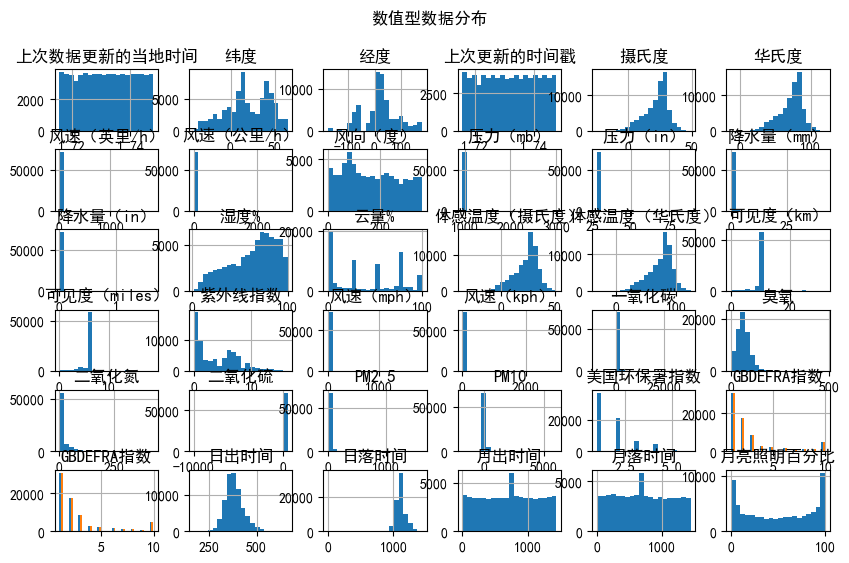

<Figure size 1000x600 with 0 Axes>

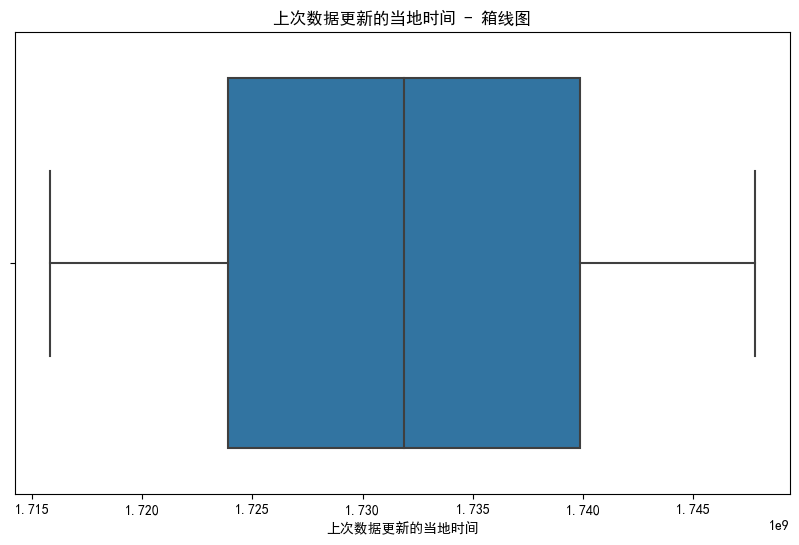

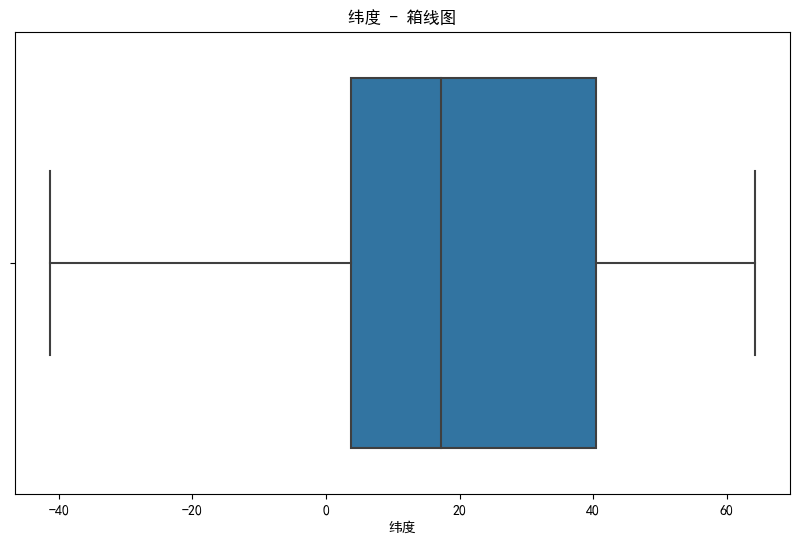

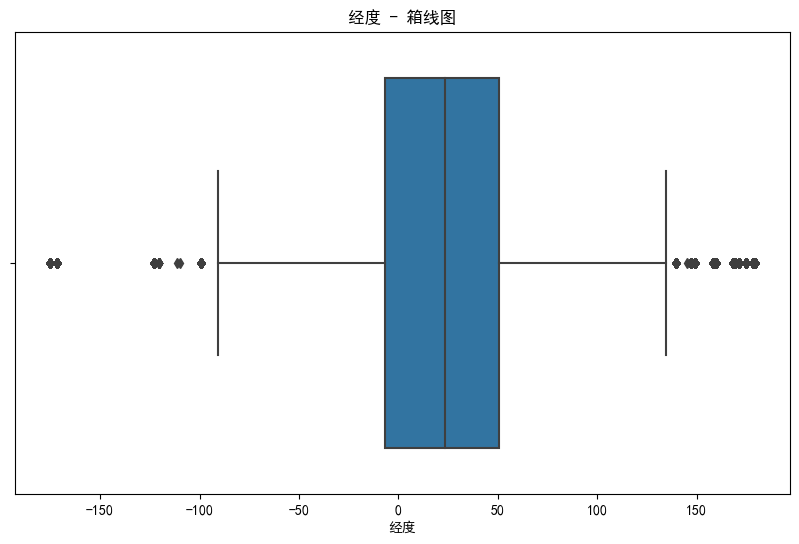

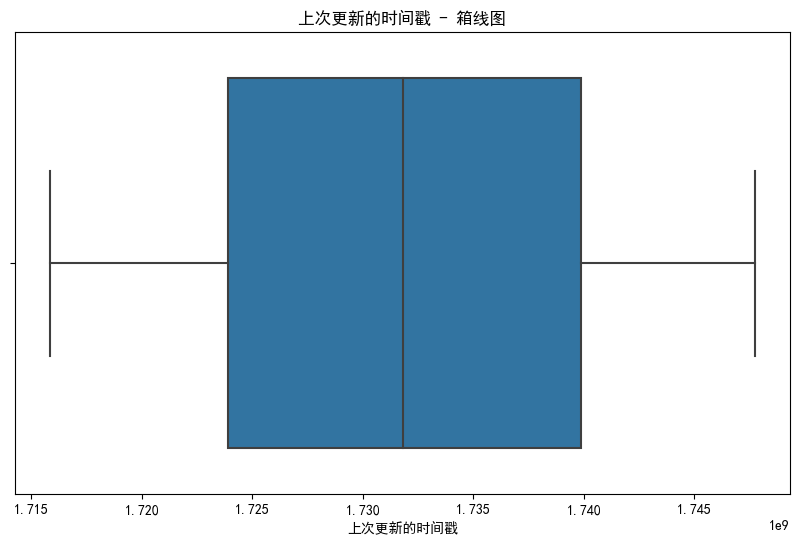

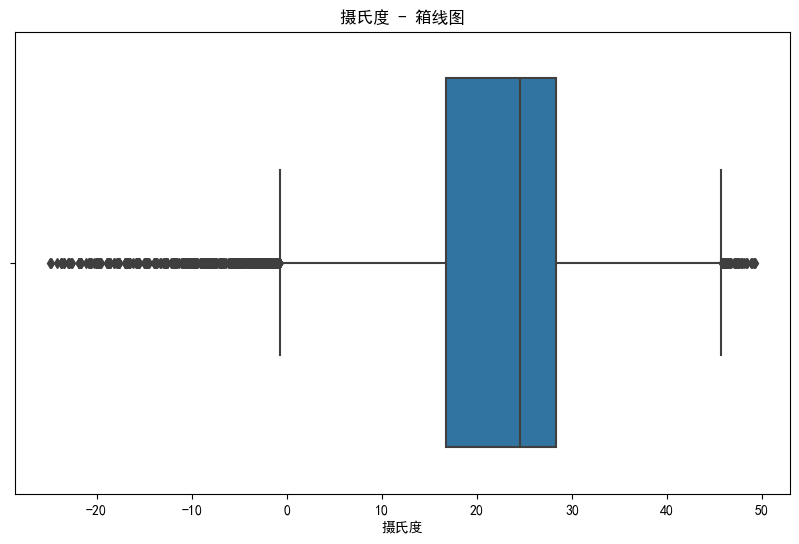

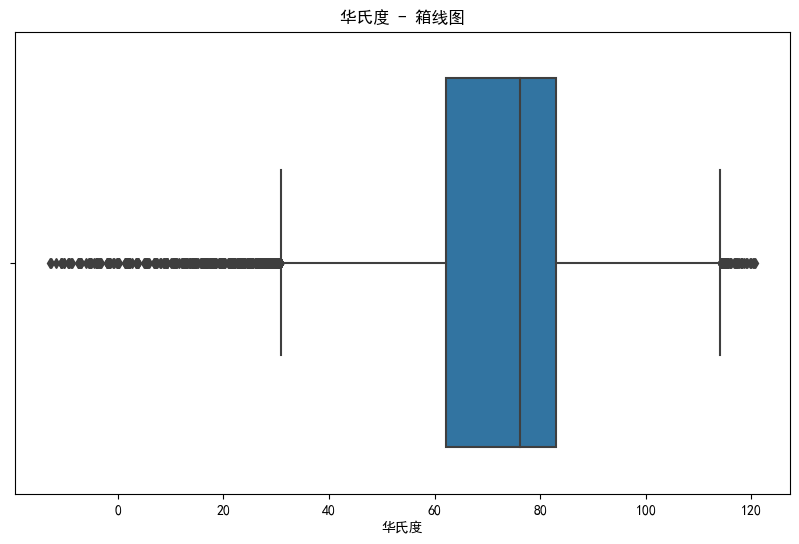

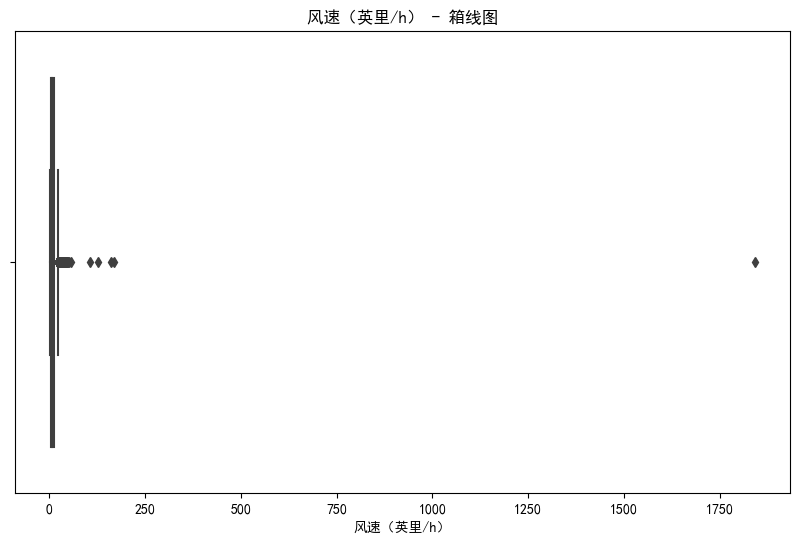

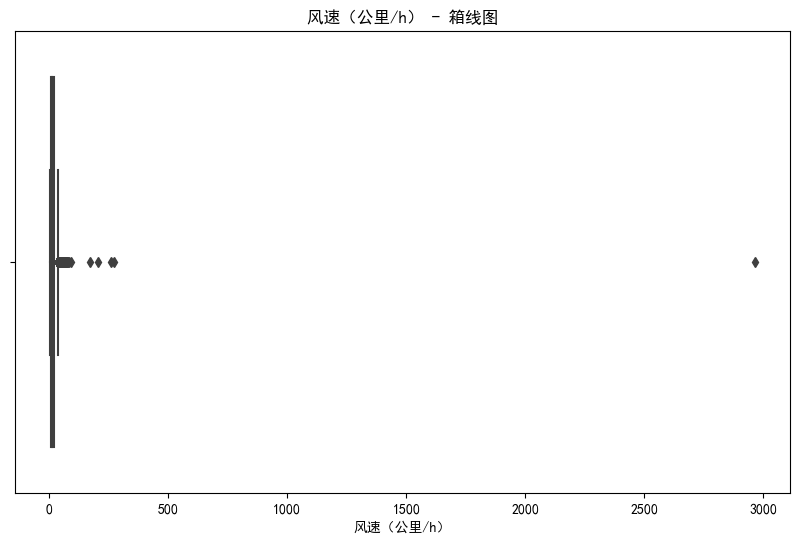

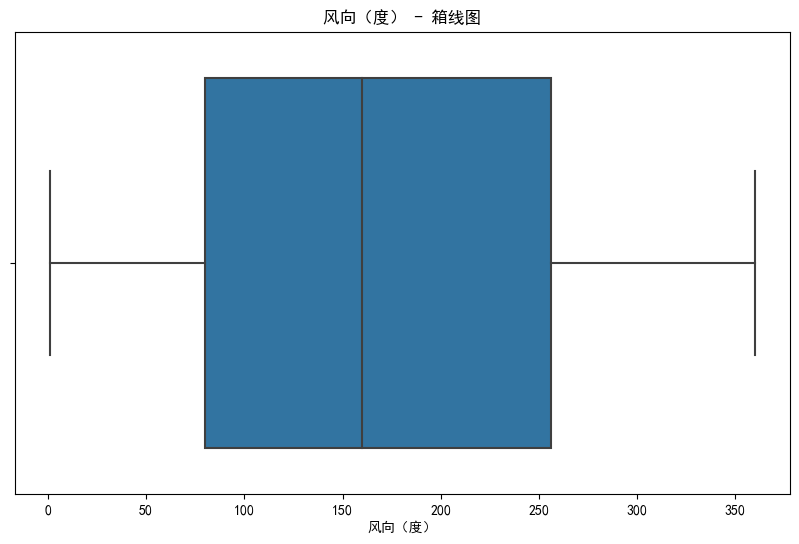

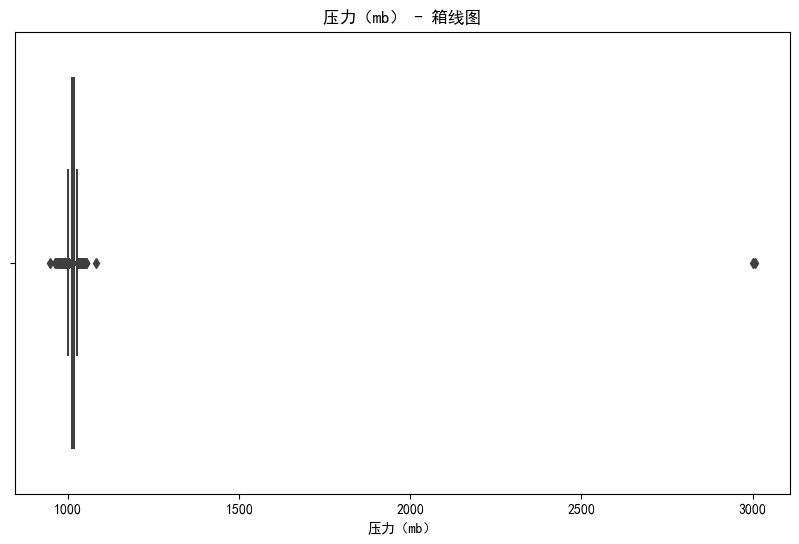

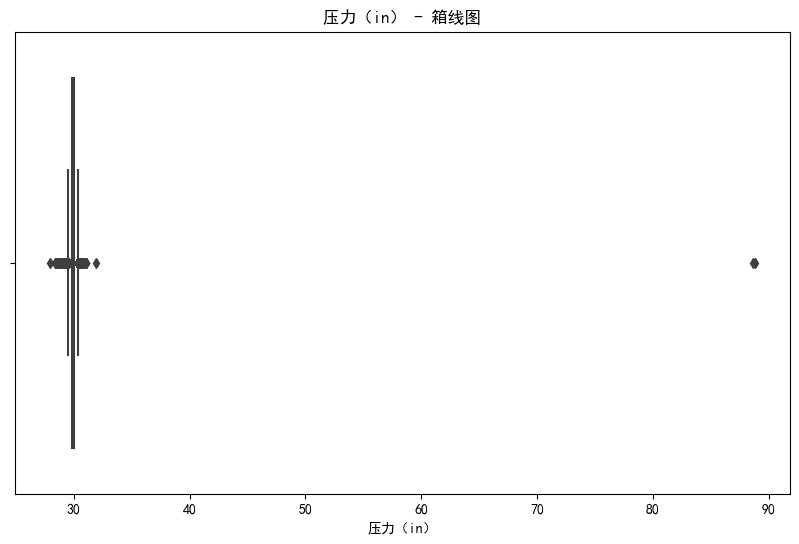

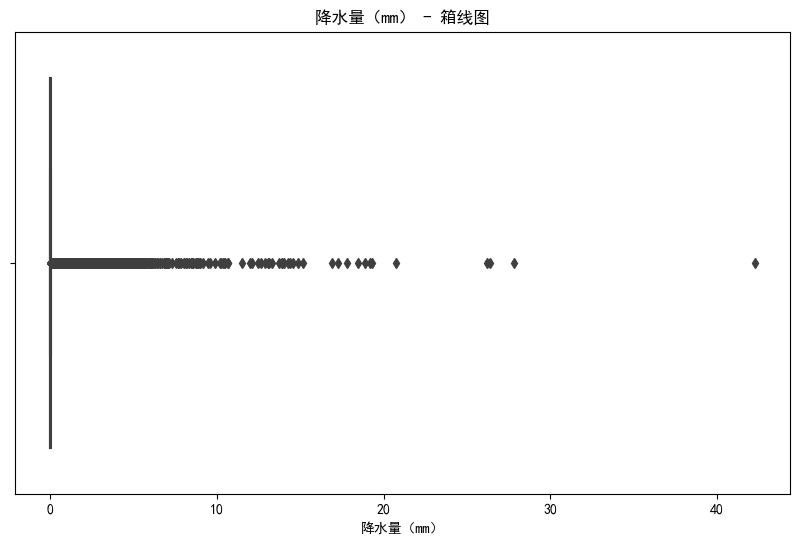

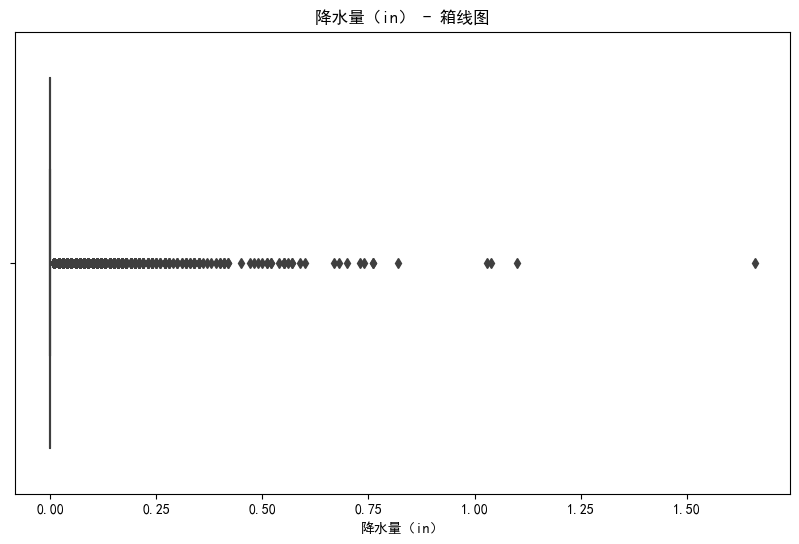

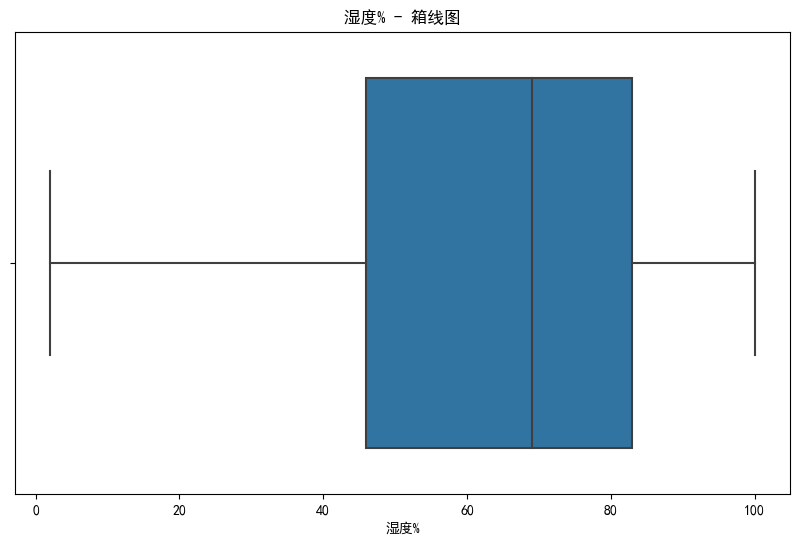

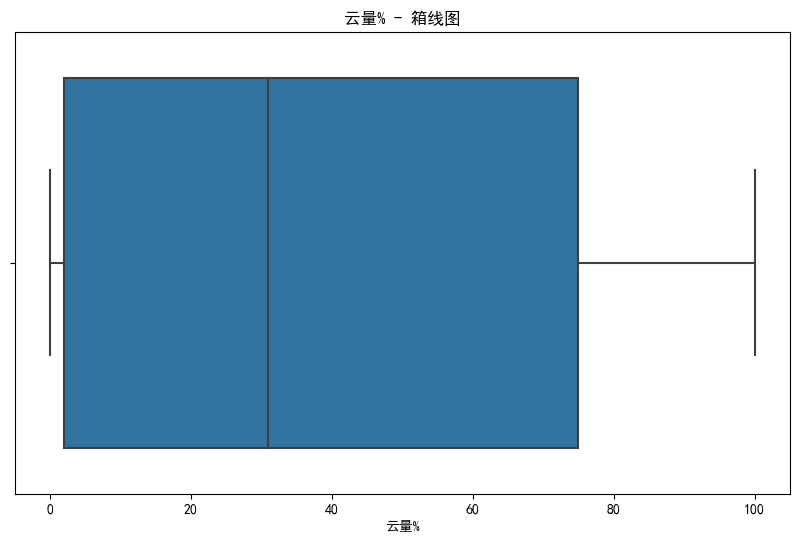

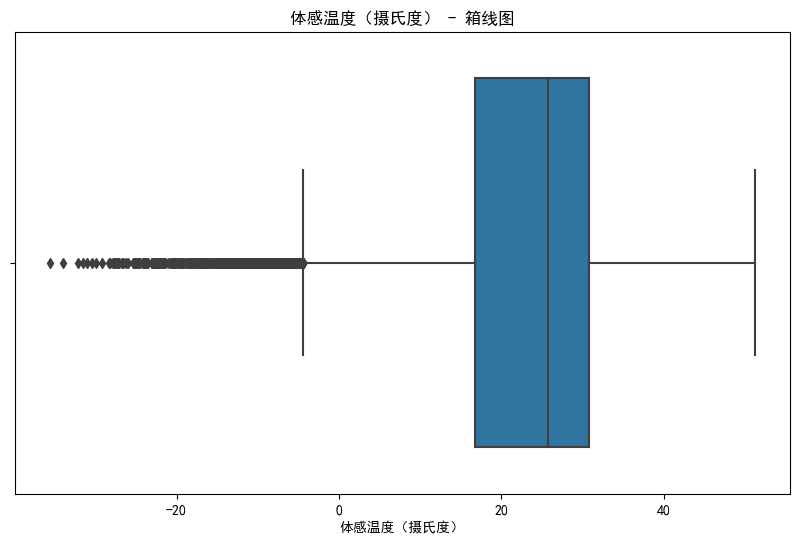

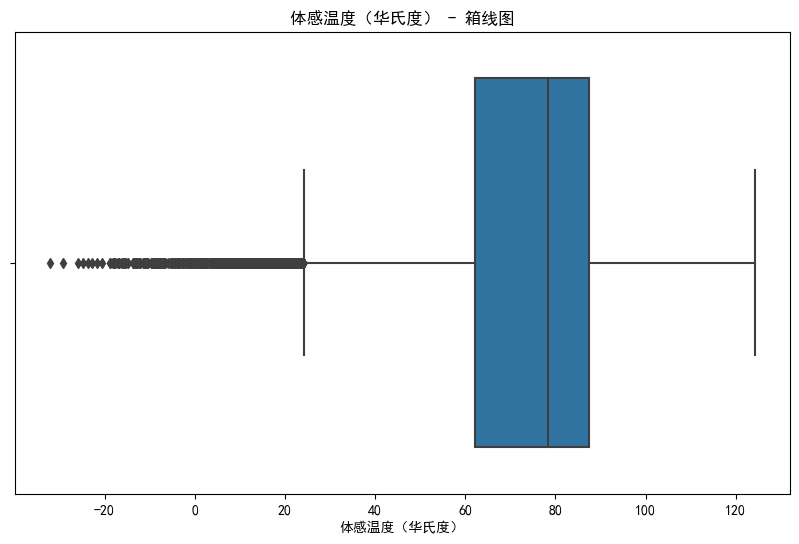

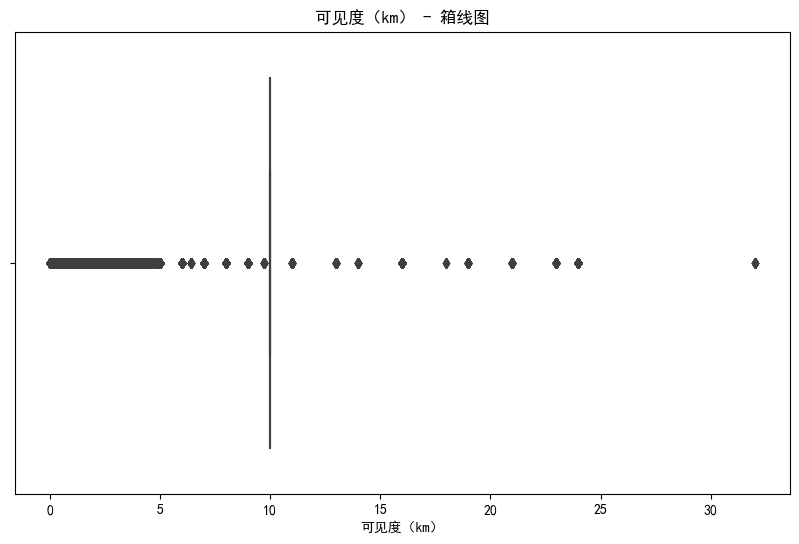

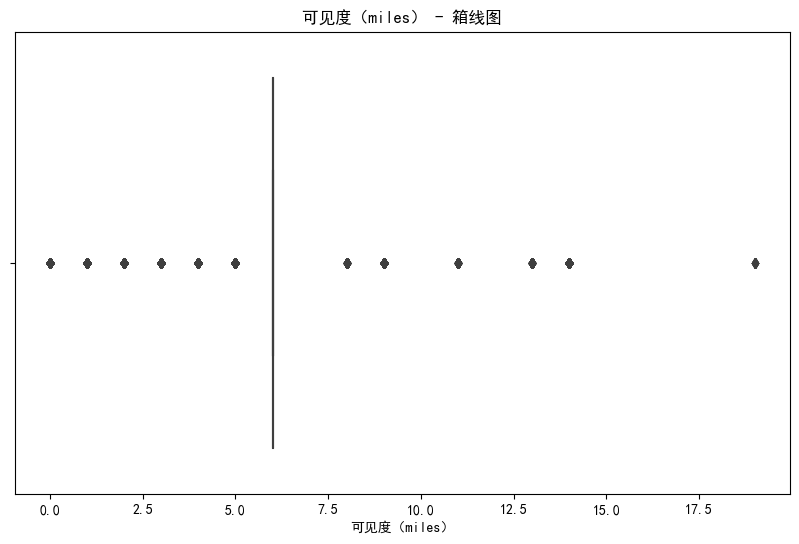

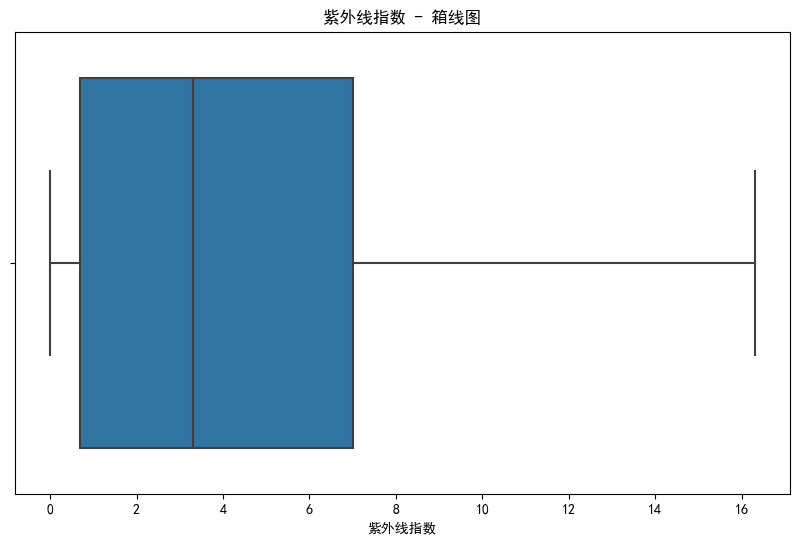

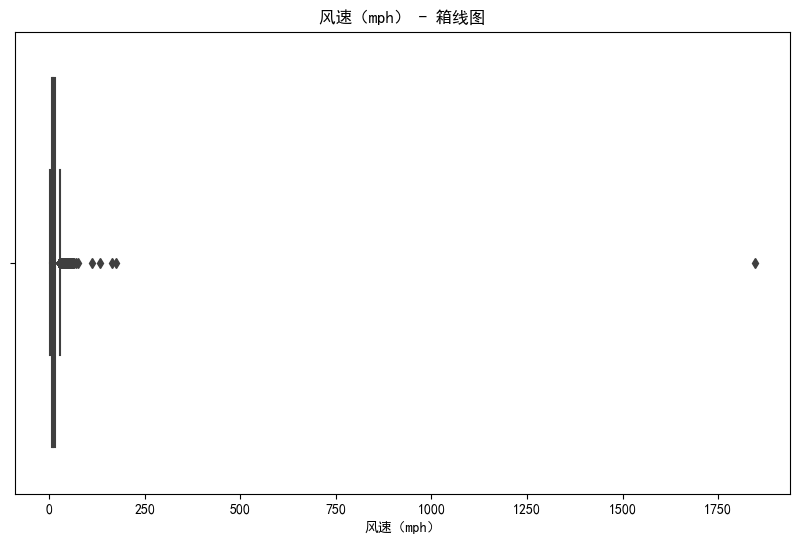

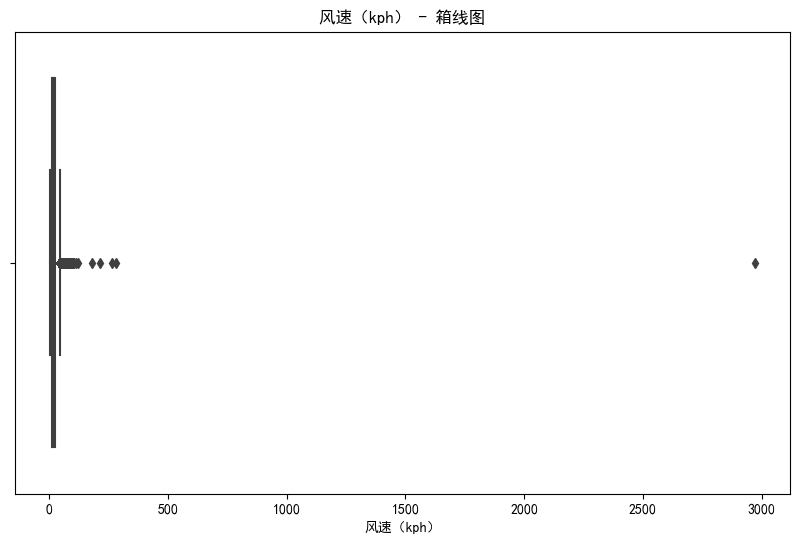

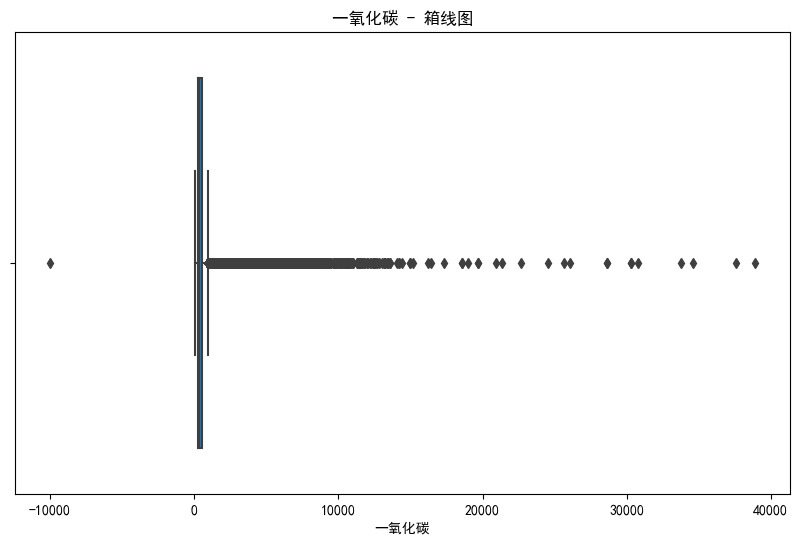

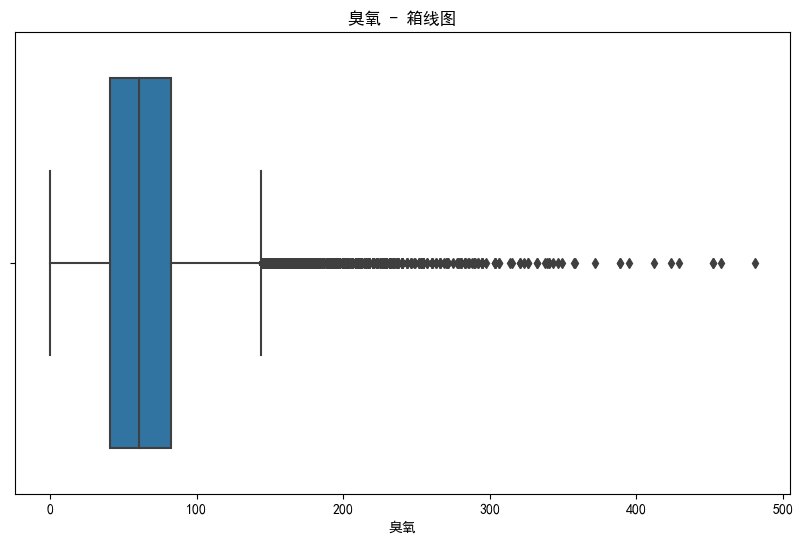

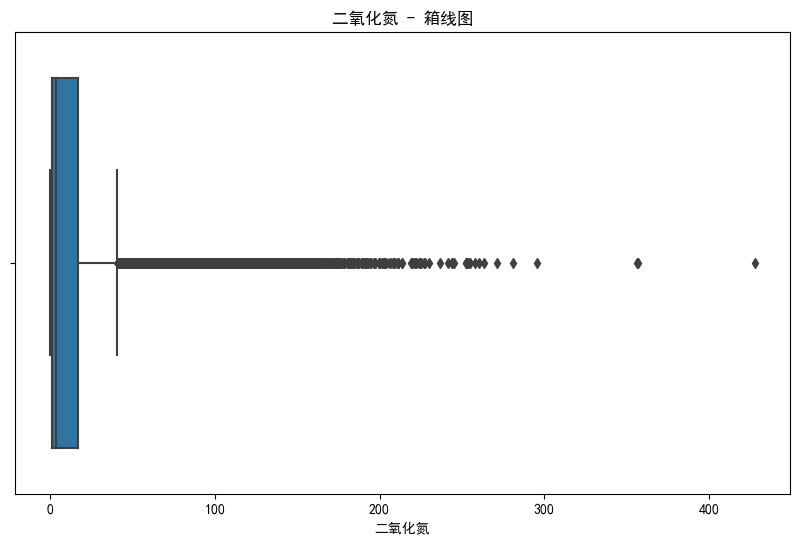

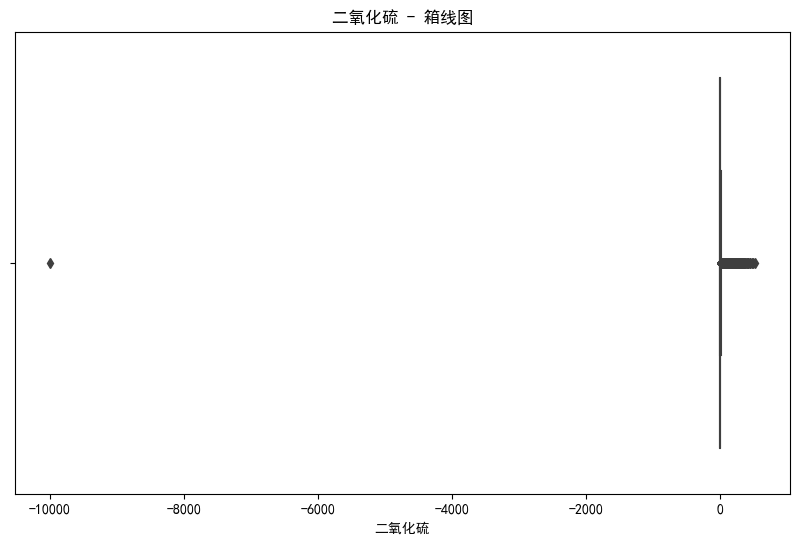

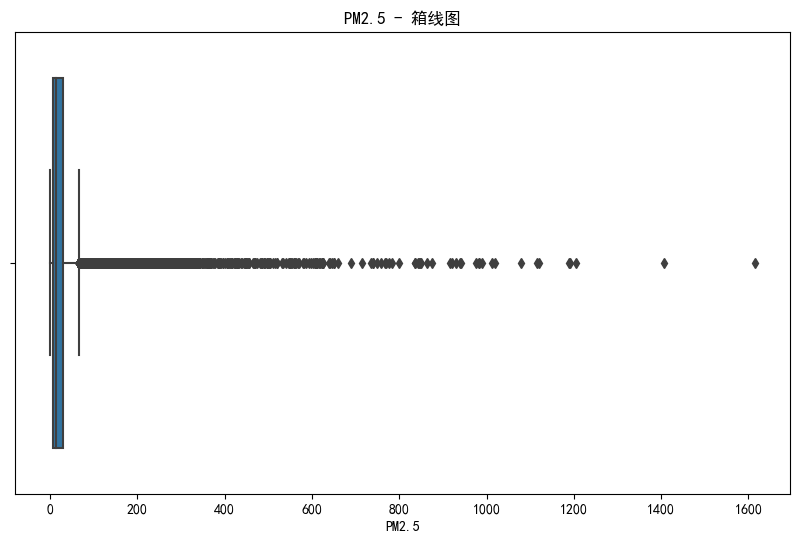

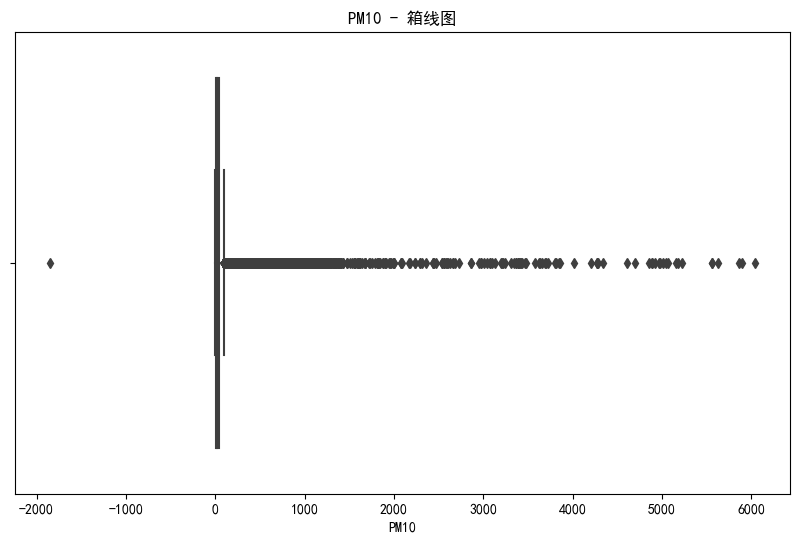

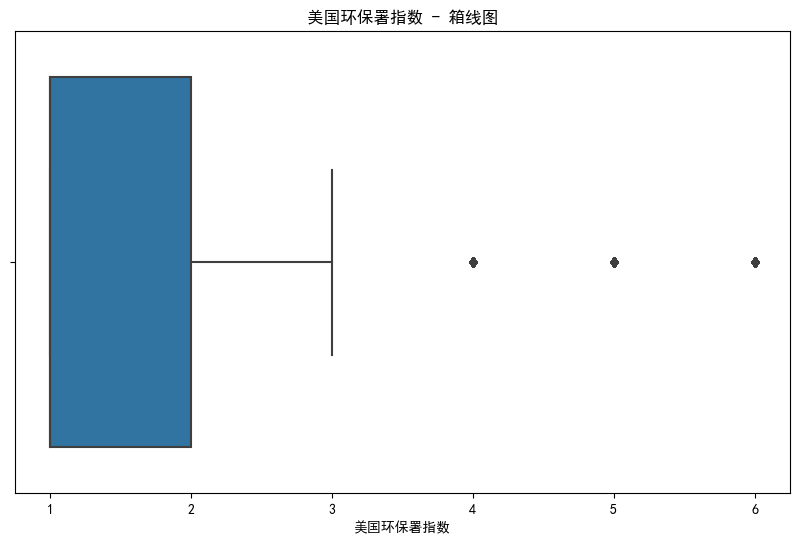

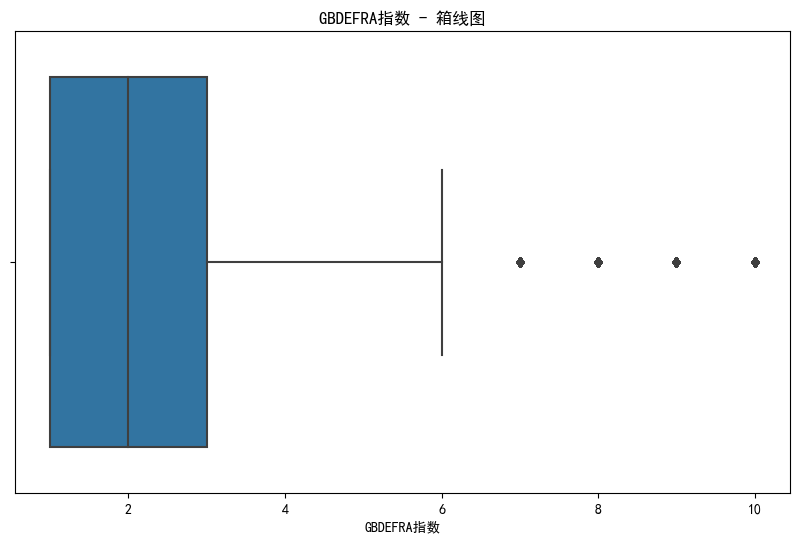

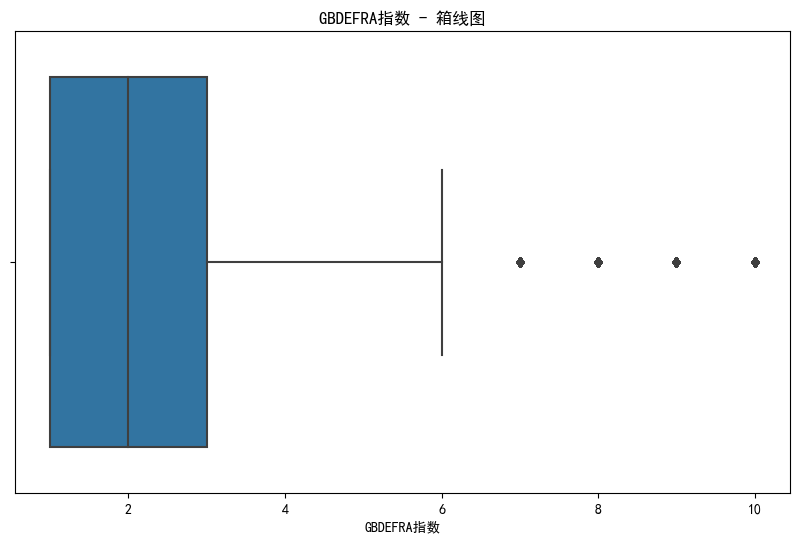

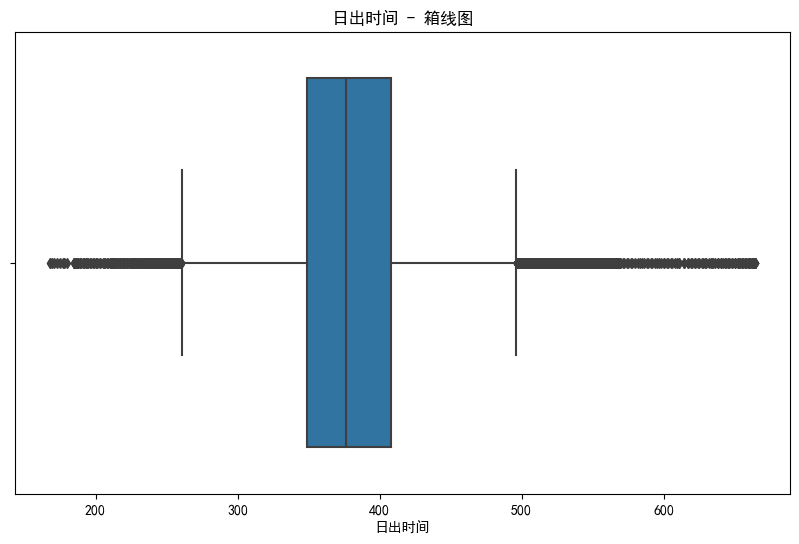

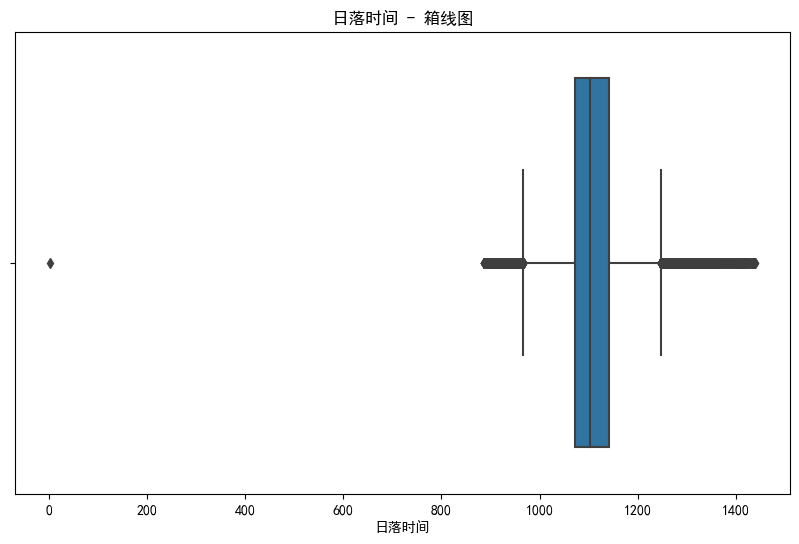

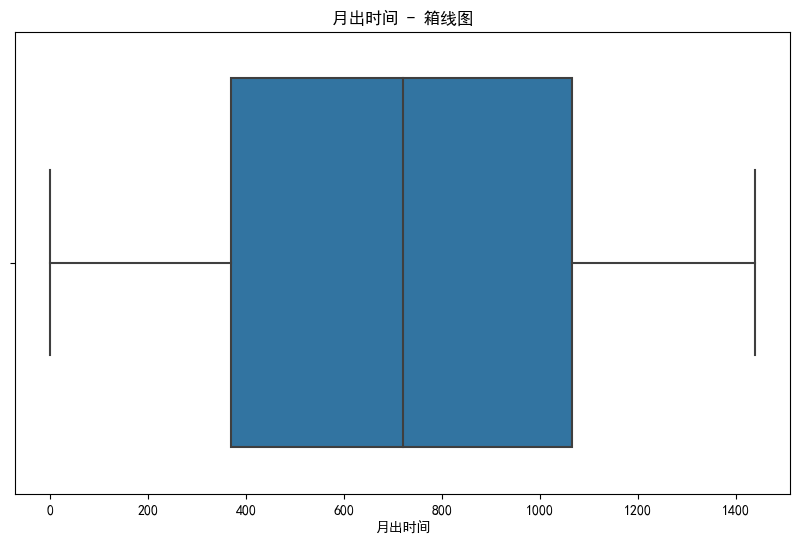

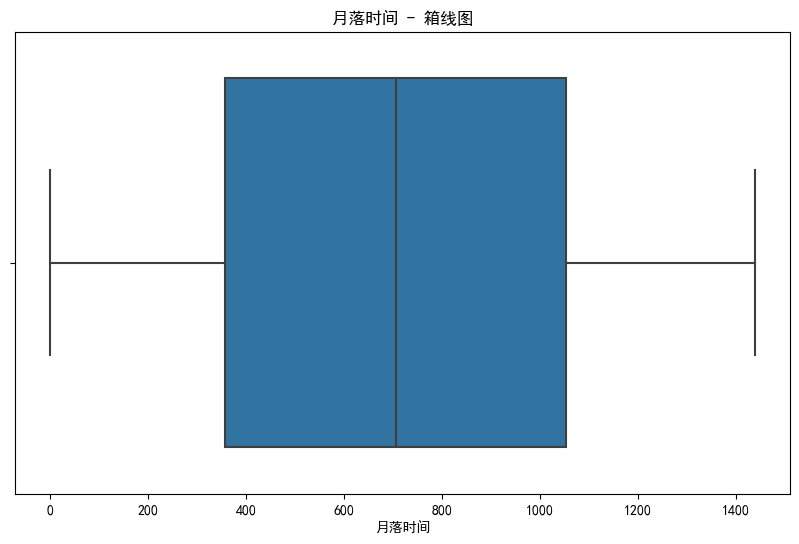

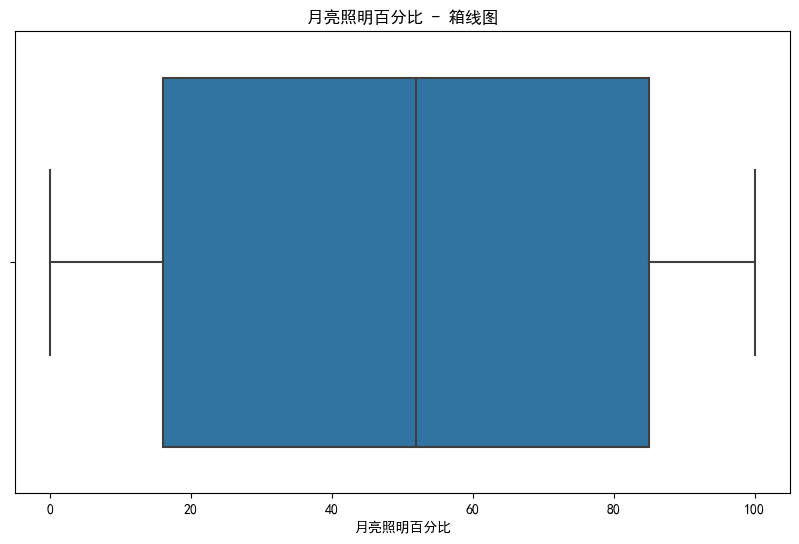

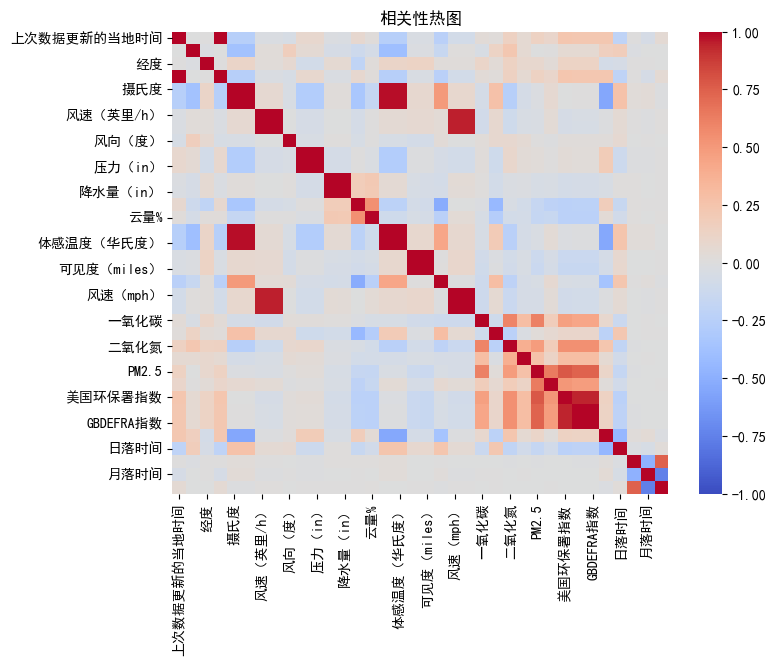

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

# 设置中文字体
matplotlib.rcParams['font.family'] = 'SimHei'  # 或者 'Microsoft YaHei'，具体根据你电脑上的字体而定
matplotlib.rcParams['axes.unicode_minus'] = False  # 解决负号显示为方块的问题

columns_to_analyze = ['上次数据更新的当地时间','纬度','经度','上次更新的时间戳','摄氏度','华氏度','风速（英里/h）','风速（公里/h）','风向（度）','压力（mb）','压力（in）','降水量（mm）','降水量（in）','湿度%','云量%','体感温度（摄氏度）','体感温度（华氏度）','可见度（km）','可见度（miles）','紫外线指数','风速（mph）','风速（kph）','一氧化碳','臭氧','二氧化氮','二氧化硫','PM2.5','PM10','美国环保署指数','GBDEFRA指数','GBDEFRA指数','日出时间','日落时间','月出时间','月落时间','月亮照明百分比']
print(df[columns_to_analyze].info())
print(df[columns_to_analyze].describe())
numeric_columns = df[columns_to_analyze].select_dtypes(include=np.number).columns

# 2. 缺失值分析
missing_data = df[columns_to_analyze].isnull().sum()
print("缺失值统计：")
print(missing_data)

# 3. 分布分析
# 数值型数据的直方图
df[columns_to_analyze].hist(bins=20, figsize=(10, 6))
plt.suptitle('数值型数据分布')
plt.show()

# 4. 异常值检测
# 使用箱线图检测异常值
plt.figure(figsize=(10, 6))
for col in numeric_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[col])
    plt.title(f'{col} - 箱线图')
    plt.show()

# 5. 相关性分析 (仅适用于数值型数据)
corr = df[columns_to_analyze].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=False, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('相关性热图')
plt.show()


# 预测模型

### 基础预测+性能评估

In [8]:
columns_to_encode = ['时区', '风向', '月相']

# 使用 get_dummies 进行独热编码
data_encoded = pd.get_dummies(data, columns=columns_to_encode, drop_first=False)
# 1. 计算特征的相关性矩阵
corr_matrix = data_encoded.corr()

# 2. 设置相关性阈值
threshold = 0.9

# 3. 找到相关性大于阈值的特征对，并删除其中一个
to_drop = set()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            colname = corr_matrix.columns[i]  # 获取相关性高的列名
            to_drop.add(colname)

# 删除高相关性的列
data_encoded = data_encoded.drop(columns=to_drop)

data_encoded['天气编码'], _ = pd.factorize(data_encoded['天气状况描述'])

data_encoded = data_encoded.drop(columns=['天气状况描述'])

data_encoded

,国家,城市,纬度,经度,上次更新的时间戳,摄氏度,风速（英里/h）,风向（度）,压力（mb）,降水量（mm）,...,风向_WSW,月相_First Quarter,月相_Full Moon,月相_Last Quarter,月相_New Moon,月相_Waning Crescent,月相_Waning Gibbous,月相_Waxing Crescent,月相_Waxing Gibbous,天气编码
0,Afghanistan,Kabul,0.719014,0.689521,0.0,0.695007,0.003317,0.938719,0.031569,0.000000,...,0,0,0,0,0,0,0,0,1,0
1,Albania,Tirana,0.783594,0.550251,0.0,0.592443,0.002556,0.888579,0.031569,0.002367,...,0,0,0,0,0,0,0,0,1,1
2,Algeria,Algiers,0.740256,0.502934,0.0,0.646424,0.003915,0.777159,0.031083,0.000000,...,0,0,0,0,0,0,0,0,1,2
3,Andorra,Andorra La Vella,0.794689,0.498617,0.0,0.421053,0.002828,0.596100,0.029140,0.007102,...,0,0,0,0,0,0,0,0,1,3
4,Angola,Luanda,0.307824,0.531657,0.0,0.686910,0.003208,0.415042,0.031083,0.000000,...,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71716,Venezuela,Caracas,0.491228,0.305523,1.0,0.690958,0.000979,0.440111,0.031083,0.003788,...,0,0,0,1,0,0,0,0,0,16
71717,Vietnam,Hanoi,0.591117,0.792986,1.0,0.785425,0.003045,0.437326,0.027198,0.022017,...,0,0,0,1,0,0,0,0,0,1
71718,Yemen,Sanaa,0.537266,0.619058,1.0,0.689609,0.001849,0.183844,0.031083,0.000000,...,0,0,0,1,0,0,0,0,0,2
71719,Zambia,Lusaka,0.245456,0.574130,1.0,0.684211,0.002447,0.208914,0.033026,0.000000,...,0,0,0,1,0,0,0,0,0,2


# 时间序列分析+LSTM

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 准备数据
X = data_encoded.iloc[:, 2:-1]  # 从第3列到倒数第二列作为特征
y = data_encoded.iloc[:, -1]     # 最后一列作为标签

# 数据划分：80% 训练集，20% 测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# 定义模型
models = {
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "MLP": MLPRegressor(hidden_layer_sizes=(100,), max_iter=500, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, random_state=42)
}

# 训练并评估每个模型
results = []
for model_name, model in models.items():
    # 训练模型
    model.fit(X_train, y_train)
    
    # 预测
    y_pred = model.predict(X_test)
    
    # 评估性能
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # 将结果保存到列表中
    results.append({"Model": model_name, "MSE": mse, "R2": r2})

# 将结果转换为 DataFrame 进行展示
results_df = pd.DataFrame(results)
print(results_df)


               Model        MSE        R2
0      Random Forest   9.876186  0.539255
1                MLP  17.630758  0.177488
2  Gradient Boosting  10.978613  0.487824
3            XGBoost   9.487233  0.557400


# 时间序列分析

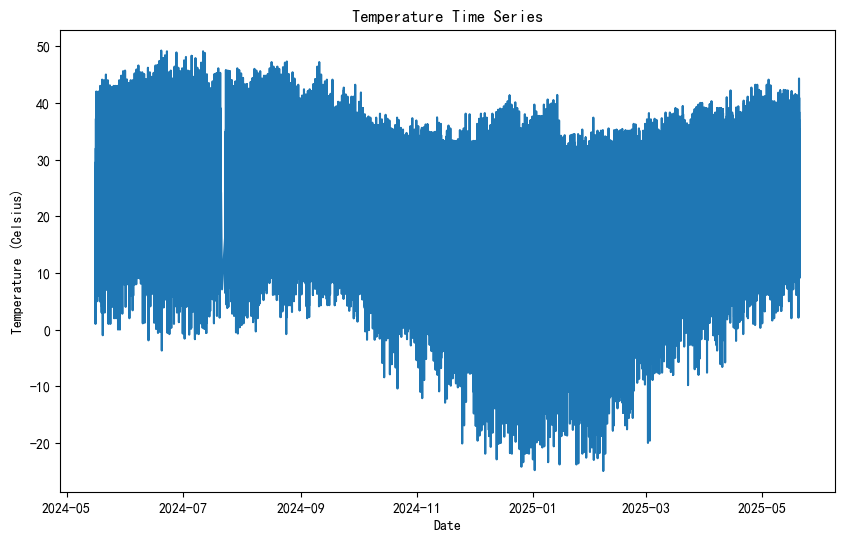

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_path = r"C:\Users\Lenovo\OneDrive\ooooooooo\文档\竞赛及项目\weather_data_preprocessing\GlobalWeatherRepository.csv"
data = pd.read_csv(file_path, encoding='utf-8')
data['上次数据更新的当地时间'] = pd.to_datetime(data['上次数据更新的当地时间'], errors='coerce')

# 2. 将 'last_updated' 列设置为索引
data.set_index('上次数据更新的当地时间', inplace=True)

# 3. 按时间排序（确保数据按时间顺序排列）
data = data.sort_index()
# 4. 选择目标特征进行时间序列分析
time_series_data = data['摄氏度']

# 5. 可视化时间序列数据
plt.figure(figsize=(10, 6))
plt.plot(time_series_data)
plt.title('Temperature Time Series')
plt.xlabel('Date')
plt.ylabel('Temperature (Celsius)')
plt.show()

Epoch 10/50, Loss: 0.2965
Epoch 20/50, Loss: 0.0532
Epoch 30/50, Loss: 0.0256
Epoch 40/50, Loss: 0.0170
Epoch 50/50, Loss: 0.0179


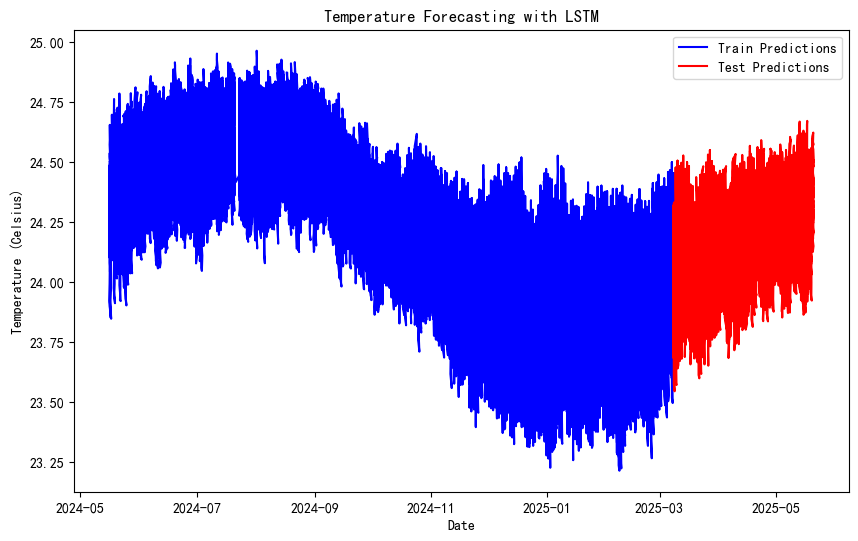

In [25]:
import numpy as np
import torch
import torch.nn as nn
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# 准备数据：从 'temperature_celsius' 中提取数据
data_lstm = data[['上次数据更新的当地时间', '摄氏度']]
data_lstm['上次数据更新的当地时间'] = pd.to_datetime(data_lstm['上次数据更新的当地时间'], errors='coerce')

# 设置 'last_updated' 列为索引并确保按时间顺序排列
data_lstm.set_index('上次数据更新的当地时间', inplace=True)

# 归一化温度数据（LSTM 对数据进行归一化效果较好）
scaler = MinMaxScaler(feature_range=(0, 1))
temperature_scaled = scaler.fit_transform(data_lstm[['摄氏度']])

# 创建时间序列数据：使用过去 30 天的数据预测未来的温度
def create_dataset(data, time_step=30):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

X, y = create_dataset(temperature_scaled, time_step=30)

# 将数据分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# 调整数据形状以适应 LSTM 输入 (samples, time_steps, features)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# 定义 LSTM 模型
class LSTMModel(nn.Module):
    def __init__(self):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size=1, hidden_size=50, num_layers=2, batch_first=True)
        self.fc = nn.Linear(50, 1)

    def forward(self, x):
        lstm_out, _ = self.lstm(x)
        out = self.fc(lstm_out[:, -1, :])  # 只取最后一个时间步的输出
        return out

# 初始化模型
model = LSTMModel()

# 定义损失函数和优化器
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# 将数据转换为 PyTorch 张量
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

# 训练 LSTM 模型
epochs = 50
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    output = model(X_train_tensor)
    loss = criterion(output, y_train_tensor)
    loss.backward()
    optimizer.step()
    
    if (epoch + 1) % 10 == 0:
        print(f'Epoch {epoch + 1}/{epochs}, Loss: {loss.item():.4f}')

# 预测
model.eval()
with torch.no_grad():
    train_pred = model(X_train_tensor)
    test_pred = model(X_test_tensor)

# 反归一化预测结果
train_pred = scaler.inverse_transform(train_pred.numpy())
test_pred = scaler.inverse_transform(test_pred.numpy())

# 可视化结果
plt.figure(figsize=(10, 6))
plt.plot(data_lstm.index[:len(train_pred)], train_pred, label='Train Predictions', color='blue')
plt.plot(data_lstm.index[len(train_pred):len(train_pred) + len(test_pred)], test_pred, label='Test Predictions', color='red')
plt.xlabel('Date')
plt.ylabel('Temperature (Celsius)')
plt.title('Temperature Forecasting with LSTM')
plt.legend()
plt.show()
